In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

In [14]:
kiosks_df = pd.read_csv('../../data/processed/Kiosk_with_LatLong.csv')

# Filter the DataFrame for rows where 'kiosk_status' is 'active'
kiosks_df = kiosks_df[kiosks_df["kiosk_status"] == 'active']

# Remove rows where 'kiosk_id' is 0
kiosks_df = kiosks_df[kiosks_df["kiosk_id"] != 0]

# Reset the index of the DataFrame
kiosks_df.reset_index(drop=True, inplace=True)

display(kiosks_df)

,kiosk_id,kiosk_name,kiosk_status,address,council_district,modified_date,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,city_asset_num,property_type,number_of_docks,power_type,footprint_length_feet,footprint_width_feet,notes,alt_name,latitude,longitude
0,2707,Rainey St @ Cummings,active,1 Rainey St,9,2022-03-04T10:38:00.000,2856,9,16597.0,parkland,17.0,solar,50.0,5.0,parkland at ROW/easement,NaN,30.255906,-97.739949
1,3838,Nueces & 26th,active,600 W. 26th St.,9,2021-01-04T00:00:00.000,2860,9,16744.0,undetermined_parking,13.0,solar,40.0,5.0,NaN,NaN,30.290680,-97.742920
2,4051,10th & Red River,active,699 East 10th Street,1,2021-01-04T00:00:00.000,2856,1,32686.0,paid_parking,13.0,solar,40.0,5.0,NaN,NaN,30.270240,-97.735780
3,4061,Lakeshore @ Austin Hostel,active,2200 S Lakeshore Blvd,3,2021-01-04T00:00:00.000,3256,3,32692.0,nonmetered_parking,15.0,solar,45.0,5.0,NaN,NaN,30.244720,-97.723360
4,11,22nd 1/2 & Rio Grande,active,710 W. 22 1/2 St,9,2021-11-04T14:24:00.000,2860,9,NaN,sidewalk,4.0,solar,NaN,NaN,Kiosk ID & footprint length and width to be re...,NaN,30.286200,-97.745160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,4059,Nash Hernandez @ RBJ South,active,1316 Festival Beach Rd,3,2021-01-04T00:00:00.000,2857,3,32693.0,nonmetered_parking,13.0,solar,40.0,5.0,NaN,NaN,30.252000,-97.734600
73,4060,Red River/Cesar Chavez @ The Fairmont,active,101 Red River St.,9,2021-01-04T00:00:00.000,2856,9,32691.0,sidewalk,13.0,solar,40.0,5.0,NaN,NaN,30.262140,-97.738700
74,4062,Lakeshore & Pleasant Valley,active,2525 South Lakeshore Boulevard,3,2021-01-04T00:00:00.000,3256,3,32711.0,nonmetered_parking,18.0,solar,55.0,5.0,NaN,NaN,30.242580,-97.717260
75,4699,East 5th/Shady @ Eastside Bus Plaza,active,5104 East 5th. Street,3,2021-07-27T08:25:00.000,2857,3,32522.0,sidewalk,10.0,solar,15.0,10.0,NaN,NaN,30.252120,-97.698070


,Start_Kiosk_ID,End_Kiosk_ID,Start_Lat,Start_Long,End_Lat,End_Long,Distance
0,2707,3838,30.255906,-97.739949,30.29068,-97.74292,3.877204
1,2707,4051,30.255906,-97.739949,30.27024,-97.73578,1.643391
2,2707,4061,30.255906,-97.739949,30.24472,-97.72336,2.021422
3,2707,11,30.255906,-97.739949,30.28620,-97.74516,3.405508
4,2707,111,30.255906,-97.739949,30.28740,-97.74780,3.582215
...,...,...,...,...,...,...,...
2921,4060,4699,30.262140,-97.738700,30.25212,-97.69807,4.058334
2922,4060,4879,30.262140,-97.738700,30.27924,-97.74371,1.961360
2923,4062,4699,30.242580,-97.717260,30.25212,-97.69807,2.126771
2924,4062,4879,30.242580,-97.717260,30.27924,-97.74371,4.803172


Minimum distance: 0.14678184557924742 km
Maximum distance: 9.475834037654108 km
Minimum latitude: 30.24258
Maximum latitude: 30.29439
Minimum longitude: -97.78375
Maximum longitude: -97.69807
Center latitude: 30.268485
Center longitude: -97.74091


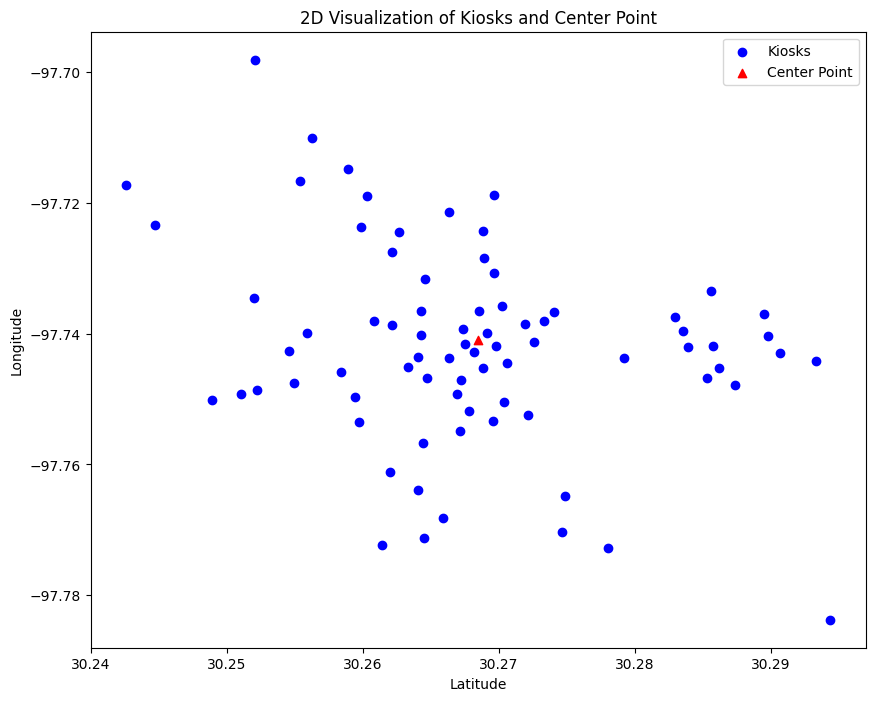

In [15]:
# Function to calculate distance between two points using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

# Preparing DataFrame for the result
result = []
for i in range(len(kiosks_df)):
    for j in range(i+1, len(kiosks_df)):
        start_id = kiosks_df.iloc[i]['kiosk_id']
        end_id = kiosks_df.iloc[j]['kiosk_id']
        start_lat = kiosks_df.iloc[i]['latitude']
        start_lon = kiosks_df.iloc[i]['longitude']
        end_lat = kiosks_df.iloc[j]['latitude']
        end_lon = kiosks_df.iloc[j]['longitude']
        distance = haversine(start_lon, start_lat, end_lon, end_lat)
        result.append([start_id, end_id, start_lat, start_lon, end_lat, end_lon, distance])

# Converting result into DataFrame
columns = ["Start_Kiosk_ID", "End_Kiosk_ID", "Start_Lat", "Start_Long", "End_Lat", "End_Long", "Distance"]
distance_df = pd.DataFrame(result, columns=columns)

# Finding the minimum and maximum distance in the distance_df DataFrame
min_distance = distance_df['Distance'].min()
max_distance = distance_df['Distance'].max()
min_lat = distance_df['Start_Lat'].min()
max_lat = distance_df['Start_Lat'].max()
min_long = distance_df['Start_Long'].min()
max_long = distance_df['Start_Long'].max()
center_lat = (min_lat + max_lat) / 2
center_long = (min_long + max_long) / 2

display(distance_df)

# Print distances and geographical details
print("Minimum distance:", min_distance, "km")
print("Maximum distance:", max_distance, "km")
print("Minimum latitude:", min_lat)
print("Maximum latitude:", max_lat)
print("Minimum longitude:", min_long)
print("Maximum longitude:", max_long)
print("Center latitude:", center_lat)
print("Center longitude:", center_long)

# Visualizing in 2D with an interactive plot
fig, ax = plt.figure(figsize=(10, 8)), plt.gca()

# Use pandas.concat to concatenate the Series and then call unique
lats = pd.concat([distance_df['Start_Lat'], distance_df['End_Lat']]).unique()
longs = pd.concat([distance_df['Start_Long'], distance_df['End_Long']]).unique()

# Scatter plot of the latitude and longitude
ax.scatter(lats, longs, c='blue', marker='o', label='Kiosks')

# Marking the center point
ax.scatter(center_lat, center_long, c='red', marker='^', label='Center Point')

# Adding labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_title('2D Visualization of Kiosks and Center Point')

# Adding a legend
ax.legend()

plt.show()

In [16]:
# Saving the DataFrame as a JSON file
distance_df.to_json('../../dist/data/processed/kiosk_vis_paths.json', orient='records')